In [1]:
import pandas as pd
data = pd.read_csv("survey lung cancer.csv")
data["LUNG_CANCER"][data['LUNG_CANCER']=='YES'] = 1
data["LUNG_CANCER"][data['LUNG_CANCER']=='NO'] = 0
data["GENDER"][data['GENDER']=='M'] = 1
data["GENDER"][data['GENDER']=='F'] = 0

C:\Users\Beryl2\AppData\Local\Temp\ipykernel_23388\1489841392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["LUNG_CANCER"][data['LUNG_CANCER']=='YES'] = 1
C:\Users\Beryl2\AppData\Local\Temp\ipykernel_23388\1489841392.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["LUNG_CANCER"][data['LUNG_CANCER']=='NO'] = 0
C:\Users\Beryl2\AppData\Local\Temp\ipykernel_23388\1489841392.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [2]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [3]:
from sklearn.model_selection import train_test_split
label = data['LUNG_CANCER']
data = data.drop(columns=["LUNG_CANCER"])
train_data, test_data, train_label, test_label = train_test_split(data,label,test_size=0.3,random_state=42)
train_data = train_data.reset_index().drop(columns=['index'])
test_data = test_data.reset_index().drop(columns=['index'])
train_label = train_label.reset_index().drop(columns=['index']).astype('int64')
test_label = test_label.reset_index().drop(columns=['index']).astype('int64')

In [54]:
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)

# create the sub models
estimators = []

# LogisticRegression
model1 = LogisticRegression()
estimators.append(('Logistic', model1))

# Bagged Decision Trees for Classification
cart = DecisionTreeClassifier()
num_trees = 96
model2 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('Cart_bagging', model2))

# Random Forest Classification
num_trees = 92
max_features = 1
model3 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
estimators.append(('RandomForest', model3))

# Extra Trees Classification
num_trees = 103
max_features = 6
model4 = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
estimators.append(('ExtraTrees', model4))

# AdaBoost Classification
num_trees = 12
model5 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('AdaBoost', model5))

# Stochastic Gradient Boosting Classification
num_trees = 90
model6 = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('GradientBoosting', model6))

# SVM
model7 = SVC(gamma='auto', probability=True)
estimators.append(('SVM', model7))

# create the voting ensemble model
ensemble = VotingClassifier(estimators, voting='soft')
results = model_selection.cross_val_score(ensemble, train_data, train_label.values.reshape(-1), cv=kfold)
print(results.mean())

e:\anaconda3\envs\shiny\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
e:\anaconda3\envs\shiny\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
e:\anaconda3\envs\shiny\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

0.8614718614718615


In [34]:
from tqdm import tqdm
k_range = list(range(80,120))  # K的范围[1, 30]
k_scores = []  # 存放每个K的评价结果
model = None
for num_trees in tqdm(k_range):
    model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
    scores = model_selection.cross_val_score(model, train_data, train_label.values.reshape(-1), cv=kfold, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

100%|██████████| 40/40 [00:16<00:00,  2.39it/s]

[0.8614718614718614, 0.8614718614718614, 0.8614718614718614, 0.8614718614718614, 0.8614718614718614, 0.8614718614718614, 0.8614718614718614, 0.8614718614718614, 0.8614718614718614, 0.8614718614718614, 0.8614718614718614, 0.8614718614718614, 0.8614718614718614, 0.8614718614718614, 0.8614718614718614, 0.8614718614718614, 0.8614718614718614, 0.8567099567099566, 0.8567099567099566, 0.8567099567099566, 0.8519480519480519, 0.8614718614718614, 0.8567099567099566, 0.8519480519480519, 0.8567099567099566, 0.8567099567099566, 0.8519480519480519, 0.8519480519480519, 0.8519480519480519, 0.8471861471861472, 0.8519480519480519, 0.8519480519480519, 0.8567099567099566, 0.8567099567099566, 0.8567099567099566, 0.8567099567099566, 0.8519480519480519, 0.8519480519480519, 0.8471861471861472, 0.8471861471861472]


Text(0, 0.5, 'Cross-Validated Accuracy')

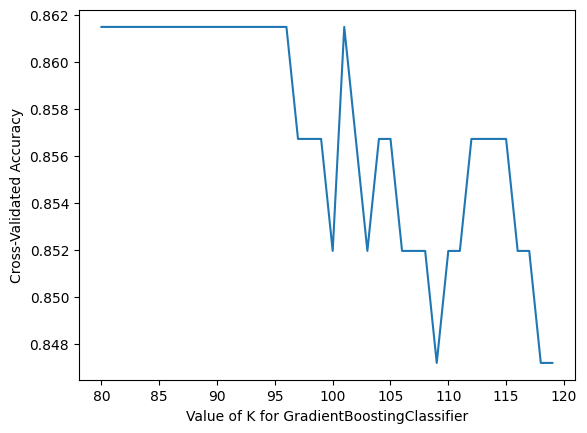

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel(f'Value of K for {type (model).__name__}')
plt.ylabel('Cross-Validated Accuracy')

e:\anaconda3\envs\shiny\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
e:\anaconda3\envs\shiny\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[[ 5  2]
 [ 1 85]]
Accuracy: 0.967741935483871
Recall: 0.9883720930232558
F1 score: 0.9826589595375722


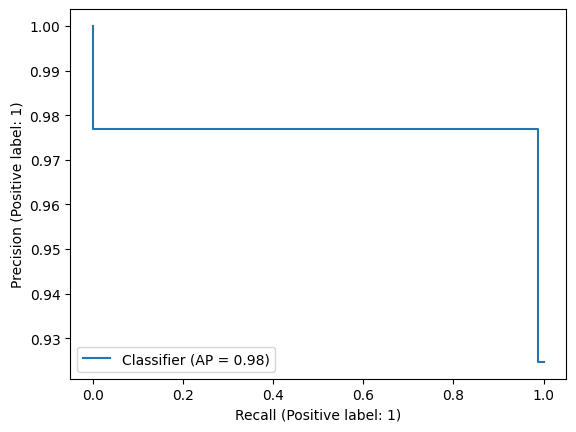

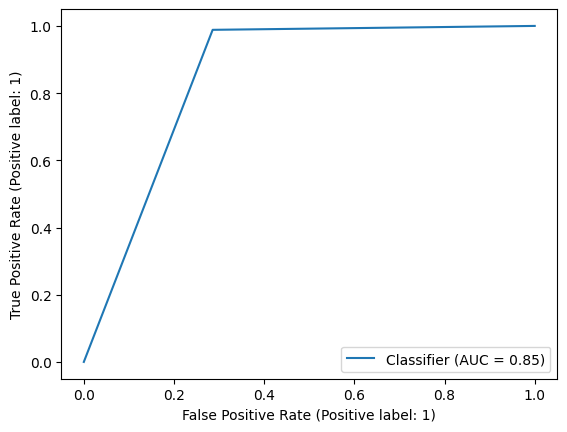

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, classification_report
from sklearn.metrics import PrecisionRecallDisplay,RocCurveDisplay
import matplotlib.pyplot as plt

ensemble.fit(train_data, train_label.values.reshape(-1))
preds = ensemble.predict(test_data)

cm = confusion_matrix(y_true=test_label.values.reshape(-1),y_pred=preds)
print(cm)
acc = accuracy_score(y_true=test_label.values.reshape(-1),y_pred=preds)
print(f'Accuracy: {acc}')
recall = recall_score(y_true=test_label.values.reshape(-1),y_pred=preds)
print(f'Recall: {recall}')
f1 = f1_score(y_true=test_label.values.reshape(-1),y_pred=preds)
print(f'F1 score: {f1}')

disp = PrecisionRecallDisplay.from_predictions(y_true=test_label.values.reshape(-1),y_pred=preds)
disp2 = RocCurveDisplay.from_predictions(y_true=test_label.values.reshape(-1),y_pred=preds)

plt.show()

In [56]:
print(classification_report(y_true=test_label,y_pred=preds, target_names=["Healthy","Patient"]))

              precision    recall  f1-score   support

     Healthy       0.83      0.71      0.77         7
     Patient       0.98      0.99      0.98        86

    accuracy                           0.97        93
   macro avg       0.91      0.85      0.88        93
weighted avg       0.97      0.97      0.97        93



In [57]:
ensemble

VotingClassifier(estimators=[('Logistic', LogisticRegression()),
                             ('Cart_bagging',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                                n_estimators=96,
                                                random_state=7)),
                             ('RandomForest',
                              RandomForestClassifier(max_features=1,
                                                     n_estimators=92)),
                             ('ExtraTrees',
                              ExtraTreesClassifier(max_features=6,
                                                   n_estimators=103)),
                             ('AdaBoost',
                              AdaBoostClassifier(n_estimators=12,
                                                 random_state=7)),
                             ('GradientBoosting',
                              GradientBoostingClassifier(n_estimators=90,
                                                         random_state=7)),
                             ('SVM', SVC(gamma='auto', probability=True))],
                 voting='soft')

In [58]:
import joblib
joblib.dump(ensemble, 'saved_model/ensemble_1.pkl')

['saved_model/ensemble_1.pkl']

In [43]:
data_prob = predictor.predict_proba(test_data)[1]

submission = test_data
submission['Results'] = preds
submission['Probability'] = data_prob
submission.to_csv('survey_results.csv',index=False)

In [44]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.912037       0.834661  412.245221                0.000000           0.291065            2       True         14
1    NeuralNetFastAI_BAG_L1   0.902778       0.748562  344.146287                0.748562         344.146287            1       True         10
2   RandomForestEntr_BAG_L1   0.884259       0.037190    0.272803                0.037190           0.272803            1       True          6
3   RandomForestGini_BAG_L1   0.884259       0.038346    1.521641                0.038346           1.521641            1       True          5
4     ExtraTreesGini_BAG_L1   0.884259       0.062749    0.448728                0.062749           0.448728            1       True          8
5         LightGBMXT_BAG_L1   0.884259       0.086099   67.807869         

e:\anaconda3\envs\myenv\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.8194444444444444,
  'KNeighborsDist_BAG_L1': 0.8101851851851852,
  'LightGBMXT_BAG_L1': 0.8842592592592593,
  'LightGBM_BAG_L1': 0.8703703703703703,
  'R

In [46]:
test_all = pd.concat([test_label,test_data],axis=1)
predictor.leaderboard(test_all)

                      model  score_test  score_val  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     ExtraTreesEntr_BAG_L1    0.978495   0.875000        0.031043       0.065001    0.303037                 0.031043                0.065001           0.303037            1       True          9
1     ExtraTreesGini_BAG_L1    0.978495   0.884259        0.040143       0.062749    0.448728                 0.040143                0.062749           0.448728            1       True          8
2   RandomForestEntr_BAG_L1    0.967742   0.884259        0.046757       0.037190    0.272803                 0.046757                0.037190           0.272803            1       True          6
3   RandomForestGini_BAG_L1    0.967742   0.884259        0.073650       0.038346    1.521641                 0.073650                0.038346           1.521641            1       True          5
4         Light

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesEntr_BAG_L1,0.978495,0.875000,0.031043,0.065001,0.303037,0.031043,0.065001,0.303037,1,True,9
1,ExtraTreesGini_BAG_L1,0.978495,0.884259,0.040143,0.062749,0.448728,0.040143,0.062749,0.448728,1,True,8
2,RandomForestEntr_BAG_L1,0.967742,0.884259,0.046757,0.037190,0.272803,0.046757,0.037190,0.272803,1,True,6
3,RandomForestGini_BAG_L1,0.967742,0.884259,0.073650,0.038346,1.521641,0.073650,0.038346,1.521641,1,True,5
4,LightGBMXT_BAG_L1,0.967742,0.884259,0.132983,0.086099,67.807869,0.132983,0.086099,67.807869,1,True,3
5,WeightedEnsemble_L2,0.967742,0.912037,1.044787,0.834661,412.245221,0.002000,0.000000,0.291065,2,True,14
6,XGBoost_BAG_L1,0.967742,0.865741,1.292795,0.220394,146.746527,1.292795,0.220394,146.746527,1,True,11
7,CatBoost_BAG_L1,0.946237,0.856481,0.133201,0.345770,398.250351,0.133201,0.345770,398.250351,1,True,7
8,LightGBM_BAG_L1,0.946237,0.870370,0.179755,0.086458,61.780710,0.179755,0.086458,61.780710,1,True,4
9,NeuralNetFastAI_BAG_L1,0.946237,0.902778,0.909804,0.748562,344.146287,0.909804,0.748562,344.146287,1,True,10


In [13]:
import pandas as pd
data = pd.read_csv("survey lung cancer.csv")
data["LUNG_CANCER"][data['LUNG_CANCER']=='YES'] = 1
data["LUNG_CANCER"][data['LUNG_CANCER']=='NO'] = 0

SettingWithCopyError: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [7]:
sample = data[2:3]
sample

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0


In [15]:
test_data = sample.drop('LUNG_CANCER',axis=1)
test_data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2


In [22]:
from autogluon.tabular import TabularDataset, TabularPredictor
predictor = TabularPredictor.load(r'AutogluonModels\ag-20230901_131052')
preds = predictor.predict_proba(test_data)

Found 1 mismatches between original and current metadata:
	INFO: AutoGluon Python micro version mismatch (original=3.9.17, current=3.9.18)


In [23]:
preds.iloc[0,1]

0.5008052587509155

In [ ]:
from sklearn.model_selection import train_test_split
label = data['LUNG_CANCER']
data = data.drop(columns=["LUNG_CANCER"])
train_data, test_data, train_label, test_label = train_test_split(data,label,test_size=0.3,random_state=42)
train_data = train_data.reset_index().drop(columns=['index'])
test_data = test_data.reset_index().drop(columns=['index'])
train_label = train_label.reset_index().drop(columns=['index'])
test_label = test_label.reset_index().drop(columns=['index'])